In [41]:
import json
import os
import numpy as np
import tensorflow as tf
from model.assembler import get_model_logits

import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

from model import train_ops
from model import summary_ops
import data.ops

%matplotlib inline

sns.set_style('white')
sns.set_context('poster')
plt.rc("axes.spines", top=False, right=False, left=False, bottom=False)
plt.rcParams['figure.figsize'] = (10.0, 2)
proto_path = './proto/deep_resnet_no_pool_HEAVY_SQUEEZE.json'
proto_name = os.path.splitext(proto_path)[0]
proto_name = os.path.basename(proto_name)

In [82]:

tf.reset_default_graph()
network_params = json.load(open(proto_path))
#input_op = tf.placeholder(tf.float32, [None, None], 'INPUT')
#label_op = tf.placeholder(tf.int32, [None], 'LABEL')
bsize = tf.placeholder_with_default(2, [], 'batch_size')
input_op, seq_len, label_op = data.ops.get_batch_producer(
    './data/TFRecords/aug_train.TFRecord', bsize)


# for debug!!!
summary_ops.add_label_hist(label_op)
logits = get_model_logits(seq_len, input_op, **network_params)

t_ops = train_ops.get_trainer(label_op, logits)
step, train, loss, conf, acc, lrate = t_ops

tf.summary.histogram('sample_diversity', label_op)
s_op = summary_ops.get_all_summaries(*t_ops)
'''sv = tf.train.Supervisor(
    logdir='/tmp/csbotos_onlab/%s/' % proto_name, summary_op=s_op,
)'''

Tensor("var_features/FCN_block_0/Conv0/conv1d/Squeeze:0", shape=(?, ?, 8), dtype=float32)
Tensor("var_features/FCN_block_0/Conv1/conv1d/Squeeze:0", shape=(?, ?, 16), dtype=float32)
Tensor("var_features/FCN_block_0/Conv2/conv1d/Squeeze:0", shape=(?, ?, 16), dtype=float32)

Tensor("var_features/FCN_block_1/Conv0/conv1d/Squeeze:0", shape=(?, ?, 32), dtype=float32)
Tensor("var_features/FCN_block_1/Conv1/conv1d/Squeeze:0", shape=(?, ?, 32), dtype=float32)

Tensor("var_features/FCN_block_2/Conv0/conv1d/Squeeze:0", shape=(?, ?, 32), dtype=float32)
Tensor("var_features/FCN_block_2/Conv1/conv1d/Squeeze:0", shape=(?, ?, 64), dtype=float32)
Tensor("var_features/FCN_block_2/Conv2/conv1d/Squeeze:0", shape=(?, ?, 64), dtype=float32)

Tensor("var_features/FCN_block_3/Conv0/conv1d/Squeeze:0", shape=(?, ?, 64), dtype=float32)
Tensor("var_features/FCN_block_3/Conv1/conv1d/Squeeze:0", shape=(?, ?, 64), dtype=float32)
Tensor("var_features/FCN_block_3/Conv2/conv1d/Squeeze:0", shape=(?, ?, 64), dtype=float3

"sv = tf.train.Supervisor(\n    logdir='/tmp/csbotos_onlab/%s/' % proto_name, summary_op=s_op,\n)"

In [6]:
with sv.managed_session() as sess:
    #print(sess.run(step))
    weight_vars = tf.get_collection('weights')
    weight_vals = sess.run(weight_vars)
    input_val = sess.run(input_op)
    features = tf.get_collection('activations')[3]
    features_val = sess.run(features, {input_op:input_val})

INFO:tensorflow:Restoring parameters from /tmp/csbotos_onlab/deep_smallkernel/model.ckpt-0
INFO:tensorflow:global_step/sec: 0


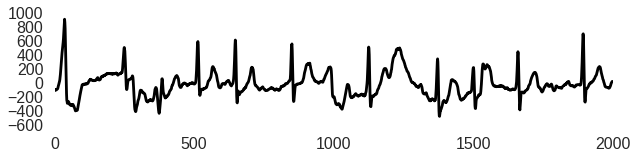

In [12]:
plt.figure(figsize=(10, 2))
plt.plot(input_val[1, 6000:8000], color='black')
sns.despine(None, None, *[True] * 4)
#plt.axis(ticks=[1,1,1,1])

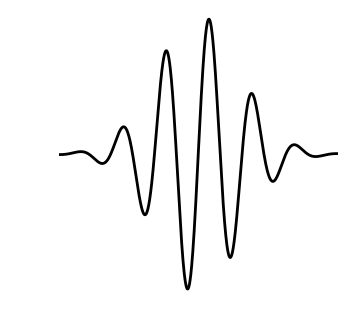

In [128]:
from scipy import signal
window = signal.gaussian(1000, 150)
plt.figure(figsize=(5, 5))

plt.axis('off')
sin = np.sin(np.linspace(-4, 4, 1000)*5) * 0.1
plt.plot(window*sin, color='black')

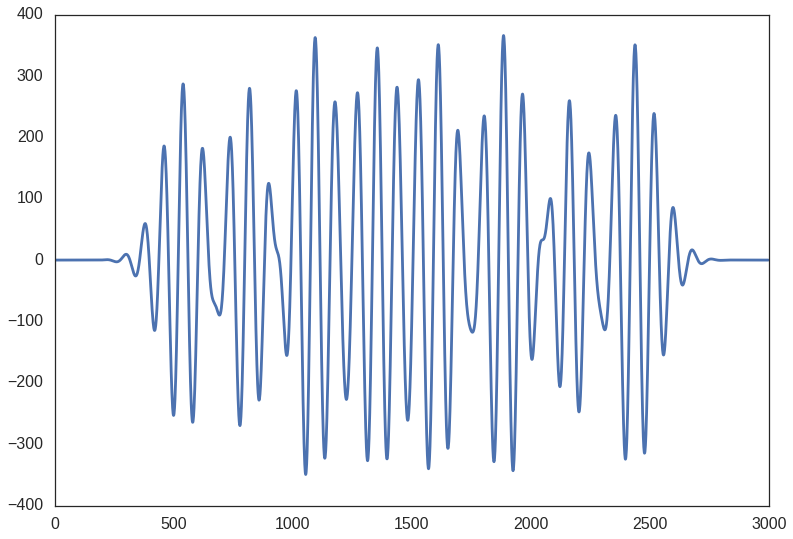

In [97]:
plt.plot(np.convolve(input_val[1, 6000:8000], window*sin))

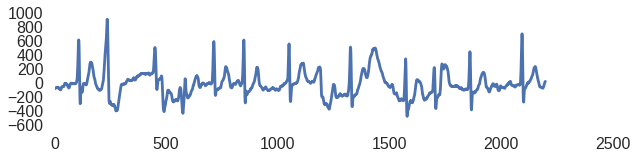

In [15]:
#plt.bar(features_val[1, :, 0] - features_val[1, :, 3], 'black')
plt.plot(input_val[1, 5800:8000])

In [14]:
features_val.shape

(2, 490, 32)

INFO:tensorflow:Restoring parameters from /tmp/csbotos_onlab/deep_resnet_no_pool_HEAVY_SQUEEZE/model.ckpt-0


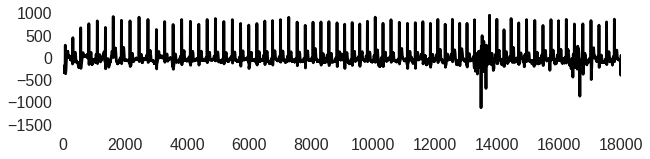

In [64]:
with sv.managed_session() as sess:
    input_val = sess.run(input_op, {'batch_size:0': 10})
    features = tf.get_collection('activations')[-3]
    features_val = sess.run(features, {input_op:input_val})

plt.figure(figsize=(10, 2))
plt.plot(input_val[1], color='black')
sns.despine(None, None, *[True] * 4)
#plt.axis(ticks=[1,1,1,1])

In [65]:
features_val.shape

(10, 562, 128)

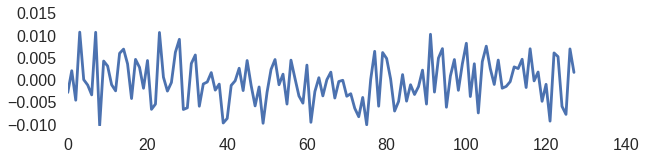

In [77]:
plt.plot(weight_vals[-3].squeeze()[0])

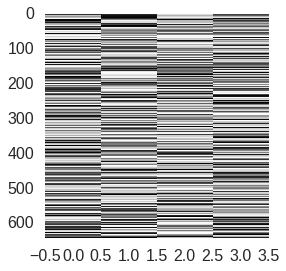

In [75]:
weight_vals[-1].shape
plt.figure(figsize=(4, 4))
plt.imshow(weight_vals[-1], aspect='auto', interpolation='nearest')

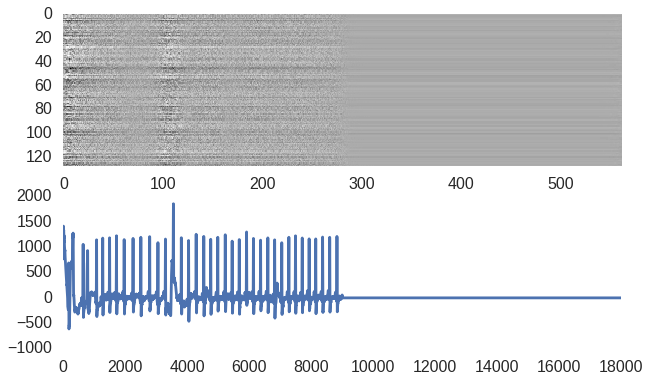

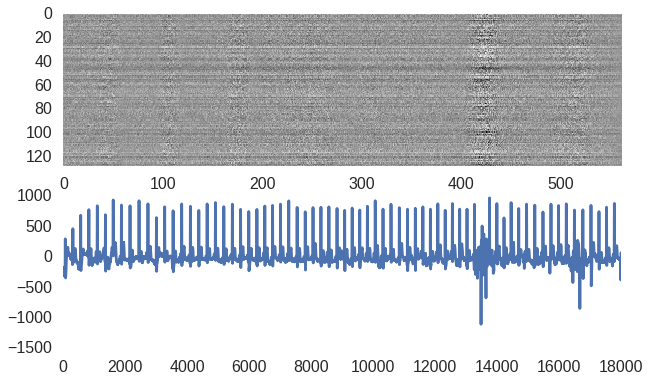

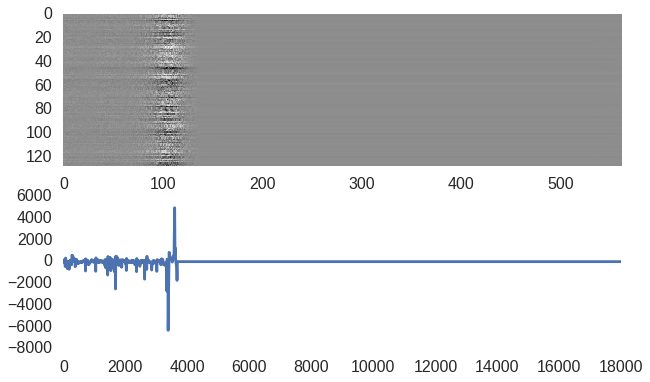

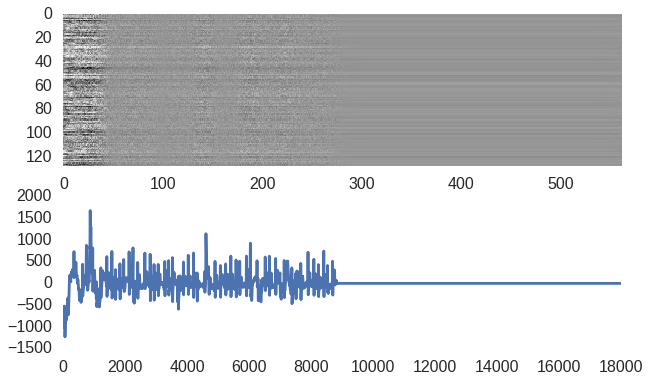

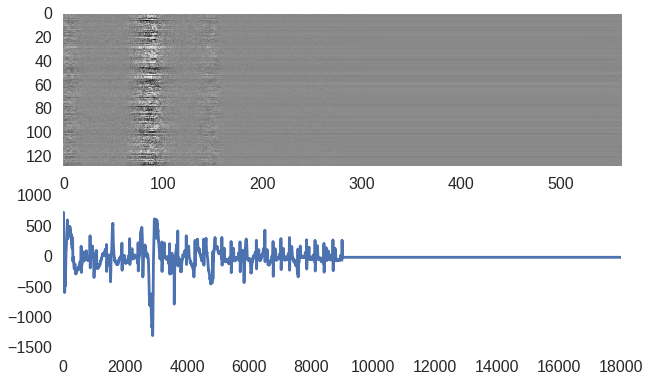

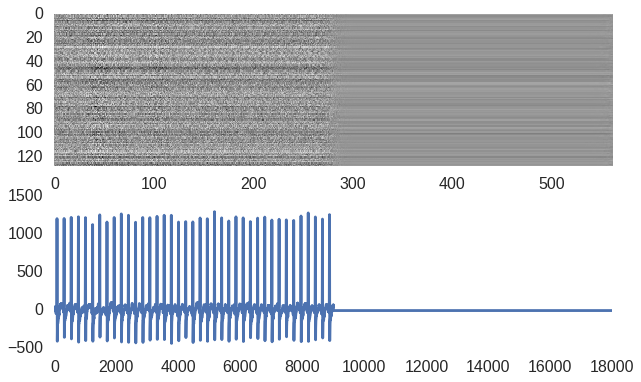

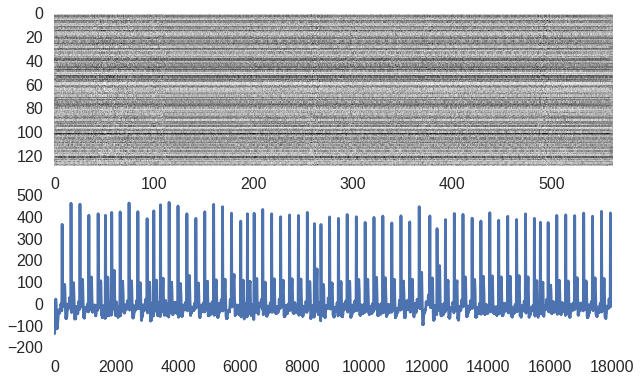

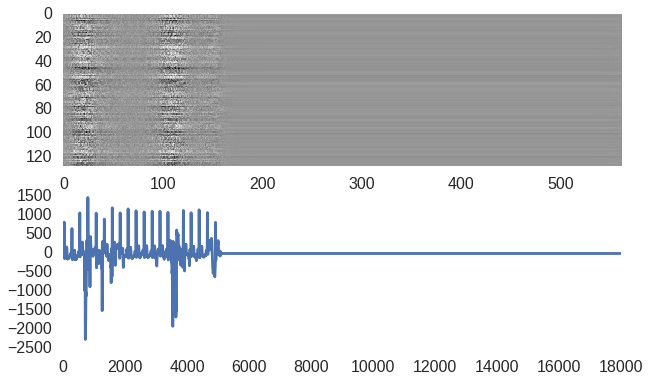

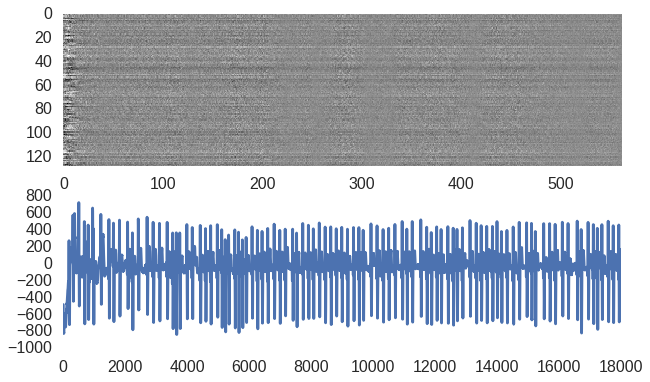

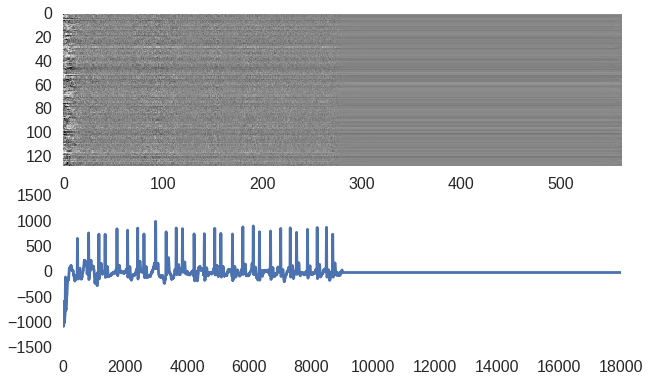

In [66]:
for i in range(len(features_val)):
    plt.figure(figsize=(10, 6))
    
    plt.subplot(211)
    plt.imshow(features_val[i].T, aspect='auto', interpolation='nearest')
    plt.subplot(212)
    plt.plot(input_val[i])

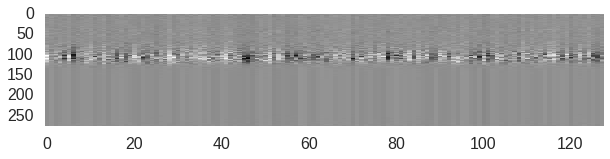

In [53]:
plt.figure(figsize=(10, 2))
plt.imshow(features_val[0], aspect='auto', interpolation='nearest')

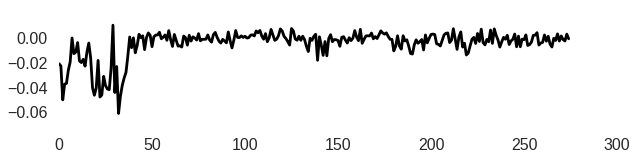

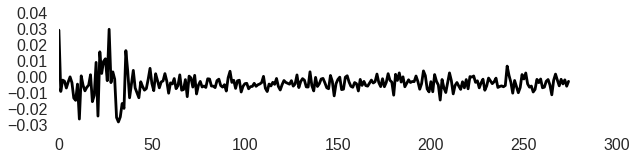

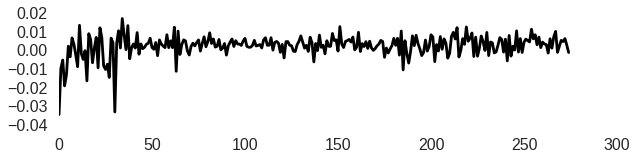

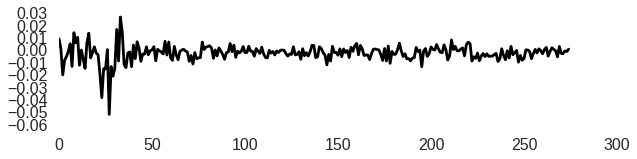

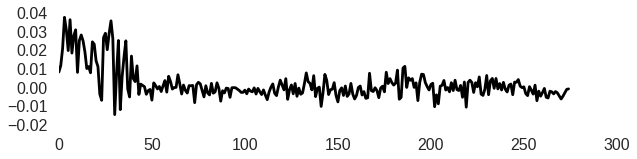

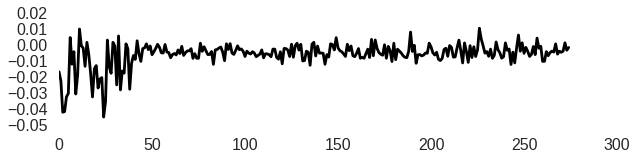

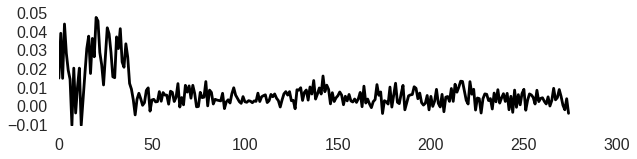

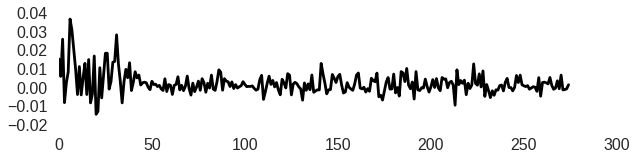

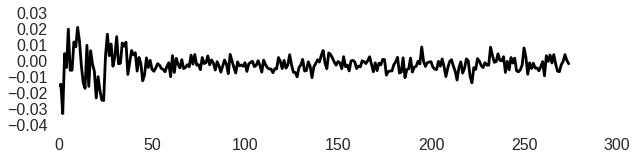

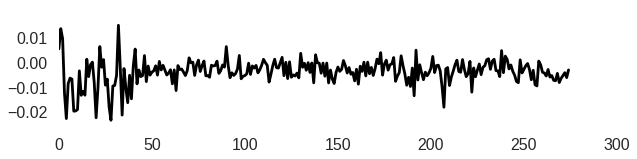

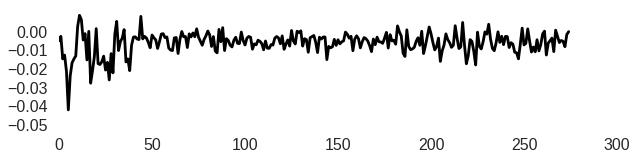

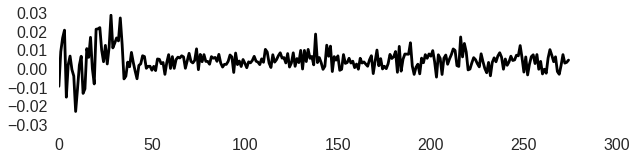

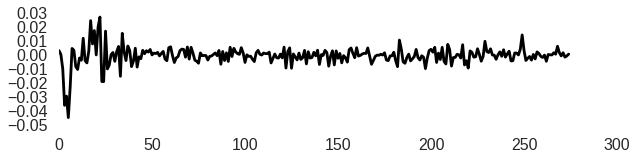

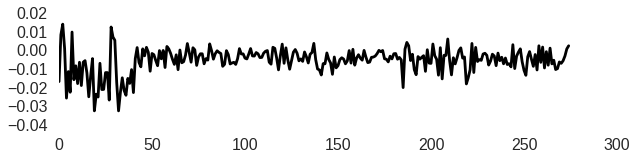

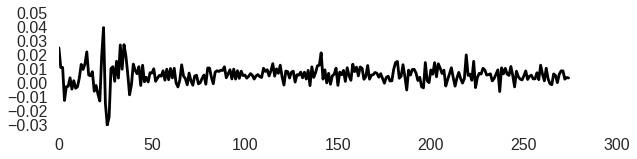

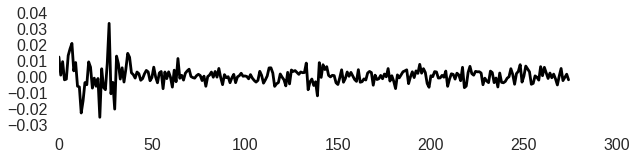

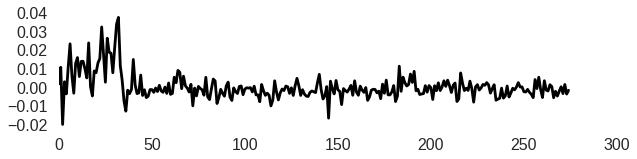

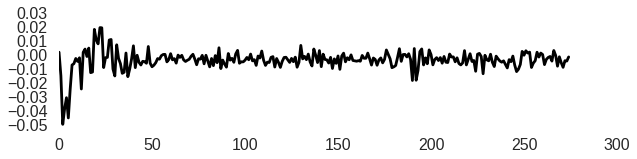

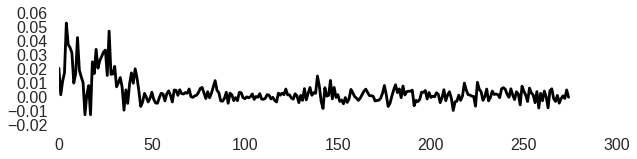

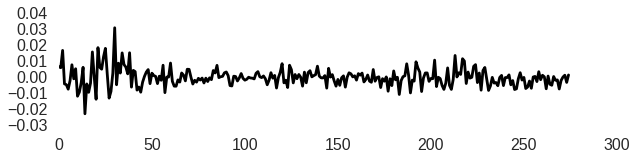

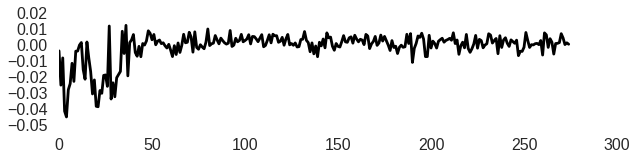

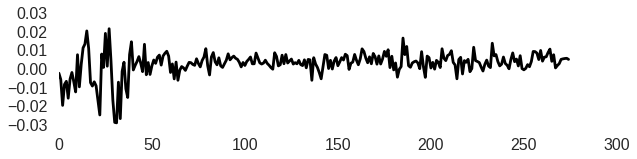

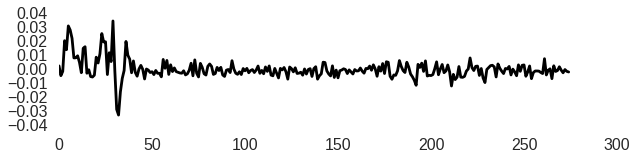

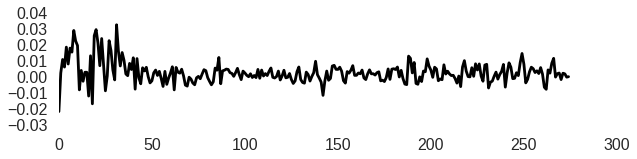

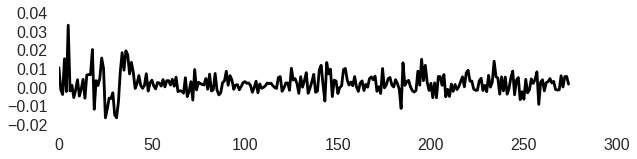

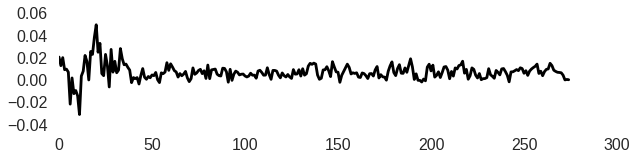

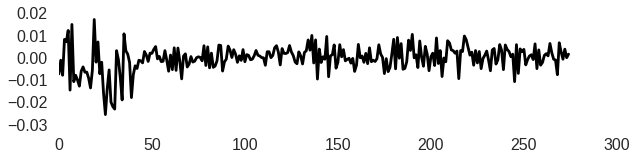

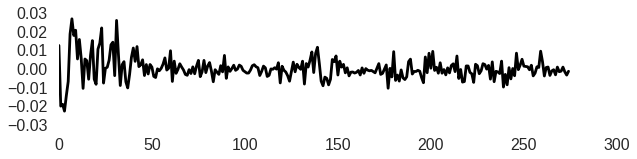

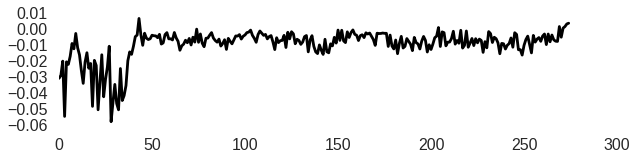

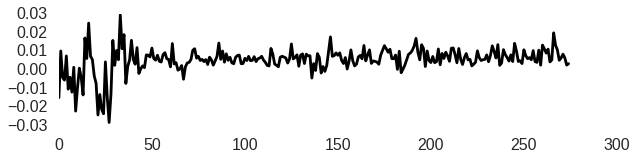

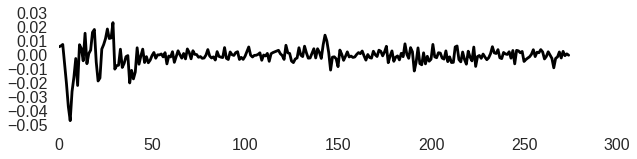

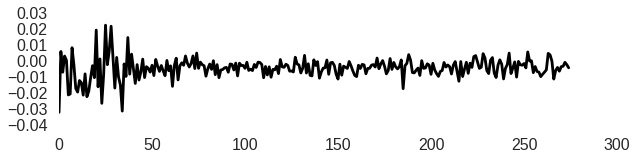

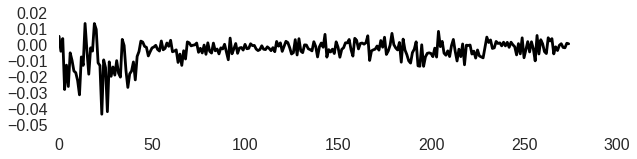

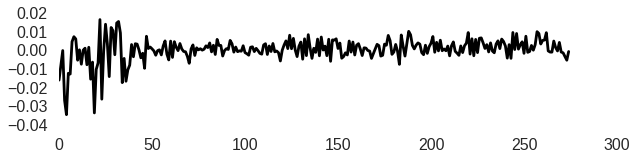

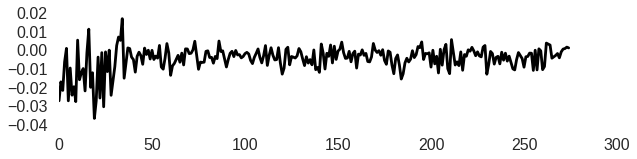

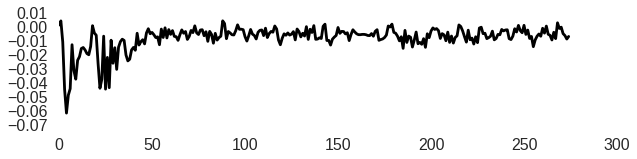

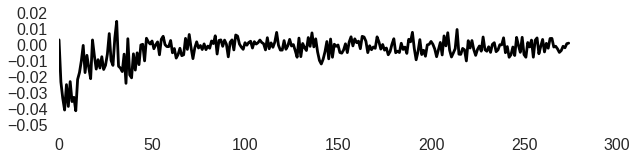

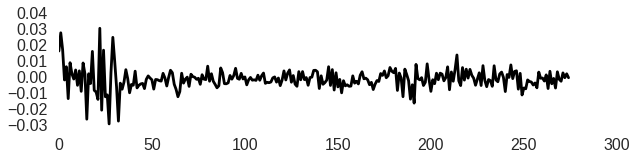

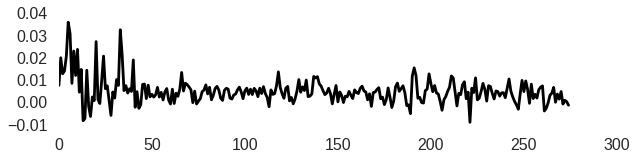

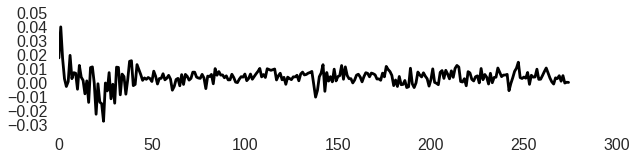

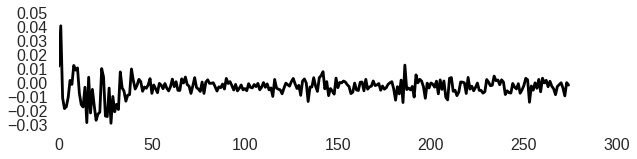

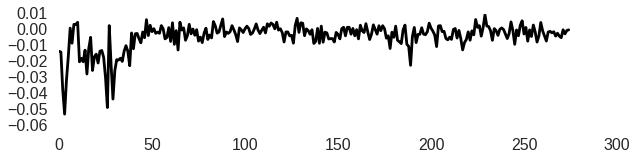

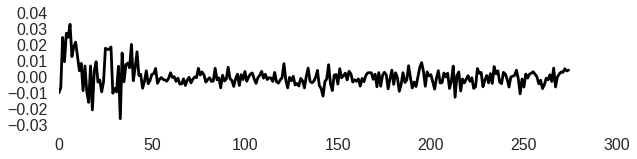

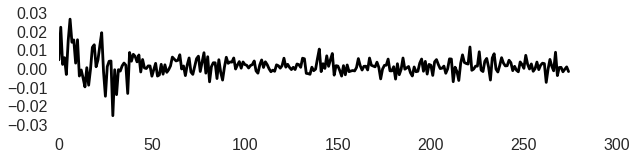

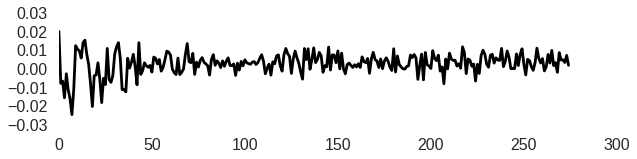

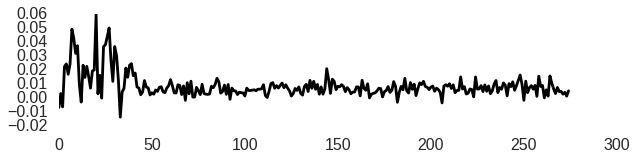

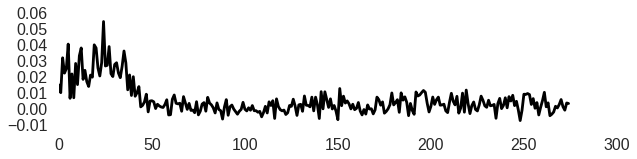

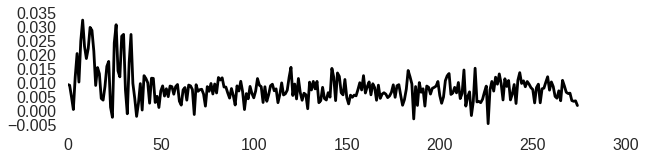

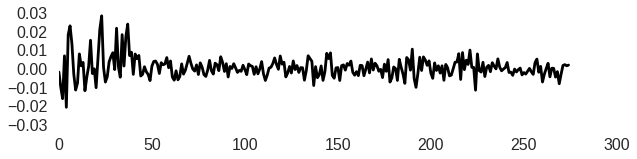

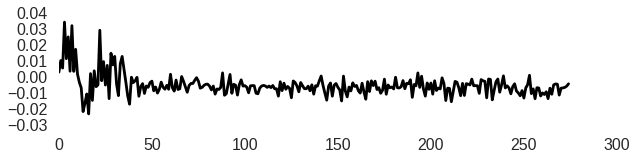

In [52]:
for f in features_val[1, :, :50].T:
    #plt.plot(input_val[0])
    #plt.show()
    plt.figure(figsize=(10, 2))
    plt.plot(f, 'black')
    #plt.axis('off')
    sns.despine(None, None, *[True] * 4)
    plt.show()
    

In [78]:
for i, v in enumerate(weight_vars):
    print(i, v.op.name, v.shape)

0 var_features/FCN_block_0/Conv0/weights (7, 1, 8)
1 var_features/FCN_block_0/Conv1/weights (4, 8, 16)
2 var_features/FCN_block_0/Conv2/weights (3, 16, 16)
3 var_features/FCN_block_0/shortcut_connection_0/weights (18, 1, 16)
4 var_features/FCN_block_1/Conv0/weights (3, 16, 32)
5 var_features/FCN_block_1/Conv1/weights (3, 32, 32)
6 var_features/FCN_block_1/shortcut_connection_1/weights (1, 16, 32)
7 var_features/FCN_block_2/Conv0/weights (3, 32, 32)
8 var_features/FCN_block_2/Conv1/weights (3, 32, 64)
9 var_features/FCN_block_2/Conv2/weights (3, 64, 64)
10 var_features/FCN_block_2/shortcut_connection_2/weights (1, 32, 64)
11 var_features/FCN_block_3/Conv0/weights (1, 64, 64)
12 var_features/FCN_block_3/Conv1/weights (3, 64, 64)
13 var_features/FCN_block_3/Conv2/weights (1, 64, 64)
14 var_features/FCN_block_3/shortcut_connection_3/weights (1, 64, 64)
15 var_features/FCN_block_4/Conv0/weights (3, 64, 64)
16 var_features/FCN_block_4/Conv1/weights (1, 64, 128)
17 var_features/FCN_block_4/sh

In [83]:
grad = tf.gradients(input_op, logits, name='grads')

LookupError: No gradient defined for operation 'batch_producer/padded_batch_queue' (op type: QueueDequeueManyV2)

In [ ]:
with sv.managed_session() as sess:
    